In [1]:
Testdf = ['/home/yupaporn/codes/Machine-Unlearning-USAI-CCA-2024/FV/FeaturesVector_Testdf_effnet.csv']
i = 0

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_1/models/')
filename = "modelrf_EffNet5_b5_1FC_cross_15AB_15AB.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)
    
dataframe = pd.read_csv(Testdf[i])
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
# dataframe = dataframe[dataframe['Sub_class'] != 'AB12']
print(dataframe.shape)
dataframe.head()

(1312, 2063)


,0,1,2,3,4,5,6,7,8,9,...,fold,15AB,Path Crop,Views,Spilt,Sub_Position_New,Sub_Position_Label,tag_AjNit,tag_AjWan,Sub_class_New
0,-0.107832,0.312149,0.017342,-0.183515,0.575328,-0.173988,-0.089337,-0.063323,-0.030137,0.059897,...,2,MildFattyLiver,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,Test,P1,P1,NaN,NaN,AB01
1,0.410584,0.660917,-0.136561,-0.185142,0.411921,-0.167172,0.004929,0.000339,-0.130162,-0.110030,...,2,MildFattyLiver,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,Test,P2,P2,NaN,NaN,AB01
2,-0.017507,0.345107,0.225857,-0.165460,0.779620,-0.193235,-0.032826,-0.147712,-0.096545,0.065196,...,2,MildFattyLiver,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,Test,P4,P4,NaN,NaN,AB01
3,-0.020903,0.117676,-0.082830,-0.135977,0.282655,-0.220009,0.111935,-0.094879,-0.103361,0.036063,...,2,MildFattyLiver,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,Test,P6,P6,NaN,NaN,AB01
4,0.064264,0.339072,0.294475,-0.157963,0.194470,-0.202357,-0.088955,-0.190239,-0.139357,-0.224388,...,2,MildFattyLiver,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,Test,P3,P3,NaN,NaN,AB01


In [3]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,-1]
print(X_test.shape)
print(y_test.shape)
print(set(y_test))

(1312, 2048)
(1312,)
{'AB01', 'AB082', 'AB06', 'AB07', 'AB10', 'AB12', 'AB05', 'AB02', 'AB09', 'AB03', 'AB081', 'Normal', 'AB083', 'AB11', 'AB04'}


In [4]:
labels =  {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [5]:
pred_list = list()
prob_list = list()
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
 
for i in range(0,len(y_prob)):
    result = y_prob[i]
    re_class = list()
    re_prop = list()  

    maxx = np.argmax(result)
    re_class= labels[maxx]
    re_prop=result[maxx]
    result = np.where(result==result[maxx], 0, result)
    pred_list.append(re_class)
    prob_list.append(re_prop)
    
dataframe['rf_Predict'] = pred_list
dataframe['rf_Prob'] = prob_list

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = dataframe['Sub_class_New'].array
pred = dataframe['rf_Predict'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 84.6798780487805%
              precision    recall  f1-score   support

        AB01       0.79      0.61      0.69        74
        AB02       0.57      0.59      0.58        59
        AB03       0.50      0.47      0.49        19
        AB04       0.81      0.68      0.74        38
        AB05       0.83      0.66      0.73        29
        AB06       0.83      0.48      0.61        21
        AB07       0.71      0.48      0.57        21
       AB081       0.78      0.56      0.65        32
       AB082       0.79      0.54      0.64        28
       AB083       0.80      0.36      0.50        11
        AB09       1.00      0.77      0.87        26
        AB10       0.80      0.40      0.53        10
        AB11       0.91      0.36      0.52        55
        AB12       0.42      0.75      0.54        32
      Normal       0.90      0.99      0.95       857

    accuracy                           0.85      1312
   macro avg       0.76      0.58      0

Text(0.5, 21.5, 'Predicted label')

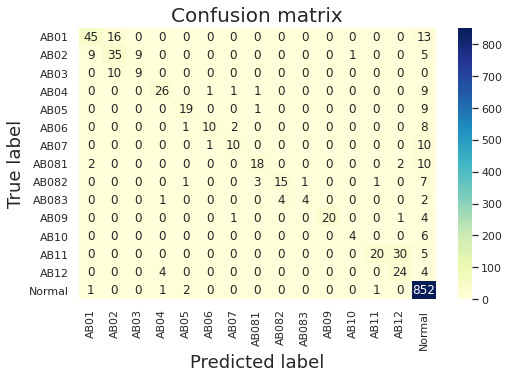

In [10]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [11]:
# Evaluation Binary-class
act= dataframe['Sub_class_New'].map({'AB01':'Abnormal', 'AB02':'Abnormal', 'AB03':'Abnormal', 'AB04':'Abnormal',
 'AB05':'Abnormal','AB06':'Abnormal', 'AB07':'Abnormal', 'AB081':'Abnormal',
 'AB082':'Abnormal', 'AB083':'Abnormal', 'AB09':'Abnormal', 'AB10':'Abnormal',
 'AB11':'Abnormal', 'AB12':'Abnormal', 'Normal':'Normal'}).values
pred = dataframe['rf_Predict'].map({'AB01':'Abnormal', 'AB02':'Abnormal', 'AB03':'Abnormal', 'AB04':'Abnormal',
 'AB05':'Abnormal','AB06':'Abnormal', 'AB07':'Abnormal', 'AB081':'Abnormal',
 'AB082':'Abnormal', 'AB083':'Abnormal', 'AB09':'Abnormal', 'AB10':'Abnormal',
 'AB11':'Abnormal', 'AB12':'Abnormal', 'Normal':'Normal'}).values
cmat = confusion_matrix(act, pred)
# TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
# print('\n    ',TN, FP, FN, TP)
print('\n    classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print('\n', classification_report(act, pred))#performance


    classifier accuracy = 92.60670731707317%

               precision    recall  f1-score   support

    Abnormal       0.99      0.80      0.88       455
      Normal       0.90      0.99      0.95       857

    accuracy                           0.93      1312
   macro avg       0.94      0.90      0.91      1312
weighted avg       0.93      0.93      0.92      1312



Text(0.5, 21.5, 'Predicted label')

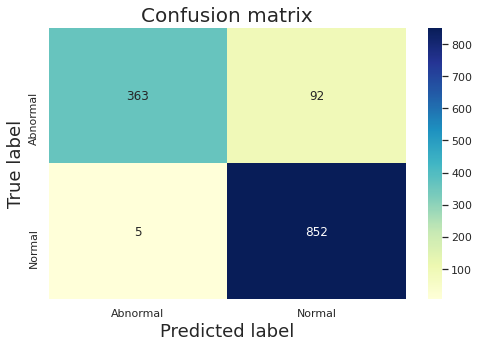

In [12]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)